In [179]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from joblib import dump, load

In [118]:
# Loading Dataset
df = pd.read_csv(r"C:\Users\Windows\OneDrive\DATA SCIENCE\StreamlitDev\Loan_default.csv")

### Data Exploration

In [120]:
# data inspection
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [121]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [122]:
#checking null values
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [123]:
#checking sum of duplicated values
df.duplicated().sum()

0

In [124]:
# data description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [125]:
df.shape

(255347, 18)

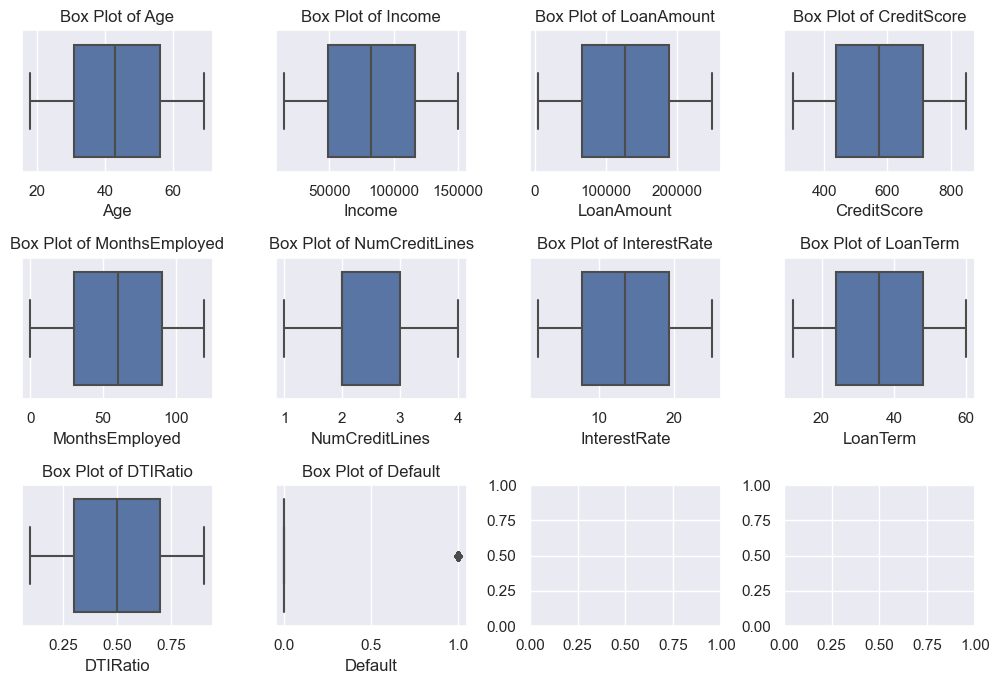

In [126]:
#checking outliers on each nemerical columns
numerical_columns= df.select_dtypes(include=['int64', 'float64']).columns
num_cols = 4
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 7))
axes = axes.flatten()

# Creating Loop for each numerical column
for i, column in enumerate(numerical_columns):
    plt.sca(axes[i])
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

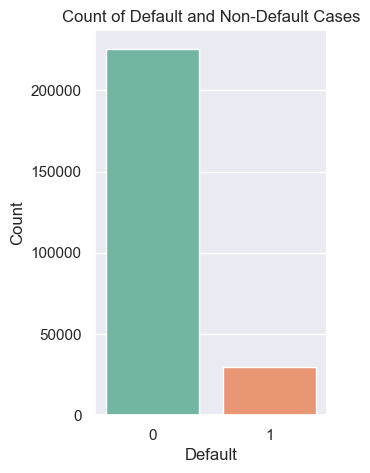

In [127]:
#checking the number of defaulters against those that comply
plt.figure(figsize=(3, 5))
sns.countplot(x='Default', data=df, palette='Set2')
plt.title('Count of Default and Non-Default Cases')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

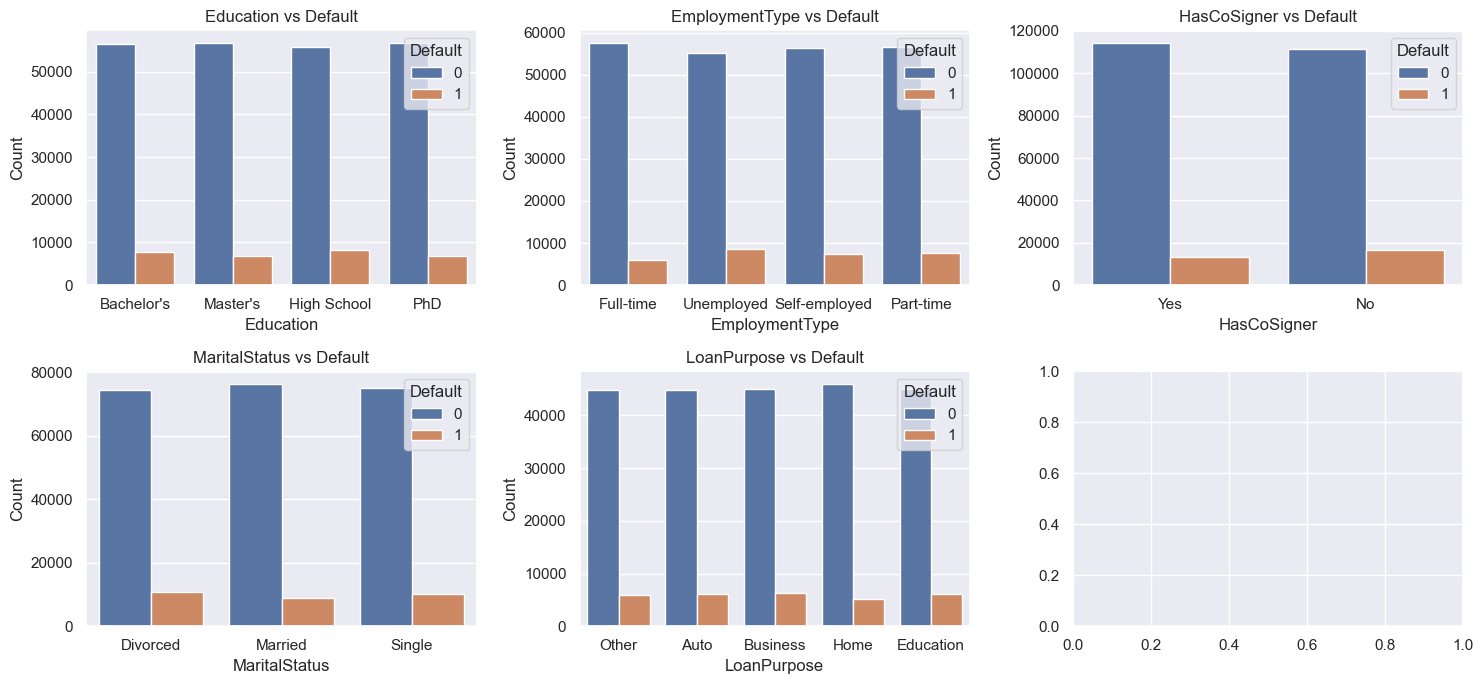

In [128]:
#default vs categorical columns
categorical_features = ['Education', 'EmploymentType', 'HasCoSigner', 'MaritalStatus', 'LoanPurpose']
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 7) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,7))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(x=feature, hue='Default', data=df, ax=ax)
    ax.set_title(f'{feature} vs Default')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

Text(0.5, 1.0, 'Correlation Heatmap')

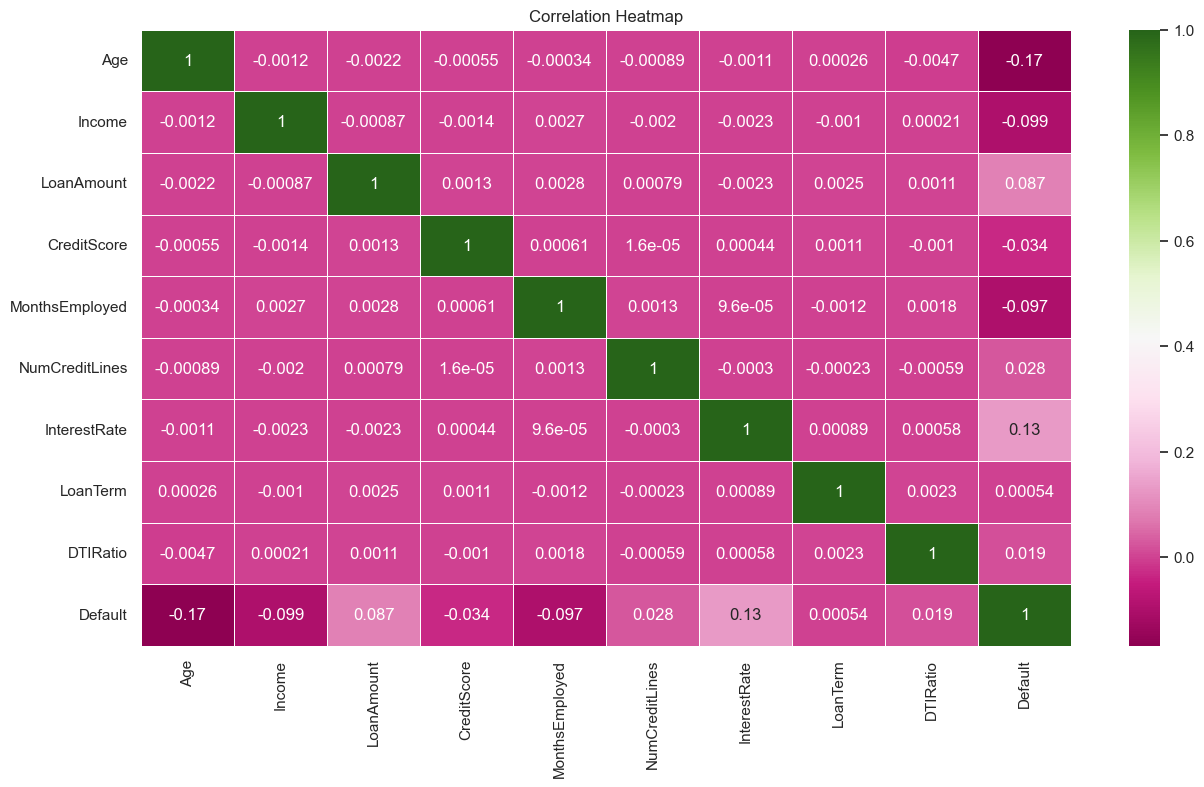

In [129]:
#checking correlation among numerical variables
corr_var= df.select_dtypes(include=['float64', 'int64']).corr()
print(corr_var)
plt.figure(figsize=(15,8))
sns.heatmap(corr_var,annot=True, cmap="PiYG", linewidths=0.5)
plt.title('Correlation Heatmap')

### Data Preprocessing

In [147]:
data = df.drop('LoanID', axis = 1)

In [149]:
for column in data:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']


In [154]:
#Since i have categorical variables, they need to be encoded so as to have numerical values for ML Algorithms to process them.
#I will be using Label Encoder
le = LabelEncoder()
data['Education']= le.fit_transform(data['Education'])
data['EmploymentType']= le.fit_transform(data['EmploymentType'])
data['MaritalStatus']= le.fit_transform(data['MaritalStatus'])
data['HasMortgage']= le.fit_transform(data['HasMortgage'])
data['HasDependents']= le.fit_transform(data['HasDependents'])
data['LoanPurpose']= le.fit_transform(data['LoanPurpose'])
data['HasCoSigner']= le.fit_transform(data['HasCoSigner'])



In [152]:
# preparing Feature and Target ( this code seperate my data into X and y )
data = data.dropna()
X = data.drop(['Default'], axis = 1) # independent variable
y = data['Default'] # Target variable
pd.set_option('display.max_columns', None) 
X.head(4)
   

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0


In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate', 'LoanTerm', 'DTIRatio']
data[col] = scaler.fit_transform(data[col])

In [164]:
# Splitting my data into training and testing sets, I will be testing 20% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('X_train: ', X_train.shape )
print('X_test: ', X_test.shape )
print('y_train: ', y_train.shape )
print('y_test: ', y_test.shape )

X_train:  (204277, 16)
X_test:  (51070, 16)
y_train:  (204277,)
y_test:  (51070,)


### Model Training and Evaluation

In [166]:
# Training a Logistic Regression
model = LogisticRegression(C=10, solver= 'liblinear')

In [167]:
model.fit(X_train, y_train) #Fit model on trained data

LogisticRegression(C=10, solver='liblinear')

In [169]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [170]:
cm=confusion_matrix(y_test,y_pred)
print (cm)

[[45091    16]
 [ 5935    28]]


In [171]:
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8834736635989818
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45107
           1       0.64      0.00      0.01      5963

    accuracy                           0.88     51070
   macro avg       0.76      0.50      0.47     51070
weighted avg       0.85      0.88      0.83     51070



In [180]:
# checking model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8834736635989818


### LOADING THE MODEL

In [188]:
joblib.dump(model, 'new_model.joblib')

['new_model.joblib']

In [192]:
loaded_model = joblib.load(r"C:\Users\Windows\OneDrive\DATA SCIENCE\StreamlitDev\new_model.joblib")

In [193]:
loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
# safe target encoder
joblib.dump(le, 'LabelEncoder.joblib')

['LabelEncoder.joblib']

In [195]:
# safe standard scaler
joblib.dump(scaler, 'MinMaxScaler.joblib')

['MinMaxScaler.joblib']

In [196]:
#Load encoder and scaler
loaded_encoder = joblib.load(r"C:\Users\Windows\OneDrive\DATA SCIENCE\StreamlitDev\LabelEncoder.joblib")
loaded_scaler = joblib.load(r"C:\Users\Windows\OneDrive\DATA SCIENCE\StreamlitDev\MinMaxScaler.joblib")

In [198]:
print("LabelEncoder and standard MinMaxScaler saved successfully.")

LabelEncoder and standard MinMaxScaler saved successfully.
